<h1>Portfolio Optimization</h1>

<p>We learned how to calculate the main metrics to analyze and evaluate a portfolio of stocks.</p>

<p>Now we can use the power of Python to optimize a portfolio!</p>
    
<p>Portfolio optimization is the technique of allocating assets so that it has the maximum return and minimum risk.<br/>
This can be done by finding the allocation that results in the maximum Sharpe ratio.</p>

<p>The simplest way to find the best allocation is to check many random allocations and find the one that has the best Sharpe ratio.</p>

<p>This process of randomly guessing is known as a Monte Carlo Simulation which uses random weights to find the optimal combination of stock weights which has the best sharpe ratio. </p>

<h4>To get started, let's define the initial stocks, download their price data, and calculate the daily returns.</h4>

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd

In [2]:
stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']

data = yf.download(stocks, start='2018-01-01')

#daily returns
data = data['Close']
x = data.pct_change()

display(x)

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,MSFT,TSLA
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.012775,0.004654,-0.010233
2018-01-04,0.004645,0.004476,0.008801,-0.008290
2018-01-05,0.011385,0.016163,0.012398,0.006230
2018-01-08,-0.003714,0.014425,0.001020,0.062638
...,...,...,...,...
2024-06-25,0.004468,0.004149,0.007327,0.026126
2024-06-26,0.019993,0.039015,0.002683,0.048145
2024-06-27,0.003986,0.021900,0.001526,0.005347


<h4>We need to store the weights, returns and Sharpe ratios for each portfolio</h4>
<p>we will be checking so that we can then find the one that is best.</p>
<p>we will define lists to store these values for each portfolio.</p>
<p>[] defines an empty list.</p>

In [3]:
p_weights = []
p_returns = []
p_risk = []
p_sharpe = []

<h4>We are going to randomly assign a weight to each stock in our portfolio, and then calculate the metrics for that portfolio, including the Sharpe ratio.</h4>

<p>To generate random weights, we will use the NumPy random function:</p>

<p>We divide the resulting weights by their sum to normalize them, so that the sum of the random weights is always 1.</p>

<p>Running the code below will generate random weights that sum up to 1.</p>

In [4]:
wts = np.random.uniform(size = 4)
wts = wts/np.sum(wts) 

print("Random Weights: ", wts)

print("Sum of Random Weights: ", sum(wts))

Random Weights:  [0.12964391 0.67559614 0.15656888 0.03819107]
Sum of Random Weights:  1.0000000000000002


<h4>Now we need to run a for loop, generate the random weights and calculate the returns, volatility and Sharpe ratio of the portfolio.</h4>
<p>We already learned how to calculate these metrics in the notebook Q_analyzing_a_portfolio, so here comes the code:</p>

In [5]:
count = 500
for k in range(0, count):
   wts = np.random.uniform(size = len(x.columns))
   wts = wts/np.sum(wts)
   p_weights.append(wts)

   #returns
   mean_ret = (x.mean() * wts).sum()*252
   p_returns.append(mean_ret)

   #volatility
   ret = (x * wts).sum(axis = 1)
   annual_std = np.std(ret) * np.sqrt(252)
   p_risk.append(annual_std)
    
   #Sharpe ratio
   sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)
   p_sharpe.append(sharpe)

<p>The for loop runs 500 times.</p>
<p>During each iteration we calculate the metrics and store them in the corresponding lists using the append() function.</p>
<p>We used 500 to optimize the time to run the code in our Playground. In other scenarios, you could generate thousands of portfolios, to get a better result.</p>

<p>The code seems long and complex, however it simply calculates the metrics using their formulas that we have seen before, and stores them in the lists.</p>

<h4>We now have the metrics for 500 portfolios!</h4>
<p>
    Let's find the index of the portfolio with the maximum Sharpe ratio using the Numpy argmax() function and output the max Sharpe ratio and the weights:
</p>

<p>This portfolio results in the maximum Sharpe ratio.</p>

In [6]:
max_ind = np.argmax(p_sharpe)

# Max Sharpe ratio
print("The maximum sharpe ratio: ", p_sharpe[max_ind])

# Stocks
print("The stocks: ", stocks)

# Stock Weights
print("The optimal stock weights that gives the maximum sharpe ratio: ", p_weights[max_ind])

The maximum sharpe ratio:  1.1402834565442161
The stocks:  ['AAPL', 'AMZN', 'MSFT', 'TSLA']
The optimal stock weights that gives the maximum sharpe ratio:  [0.28120727 0.05025823 0.46683802 0.20169648]


<h4>Let's draw a bar chart visualizing the weights:</h4>

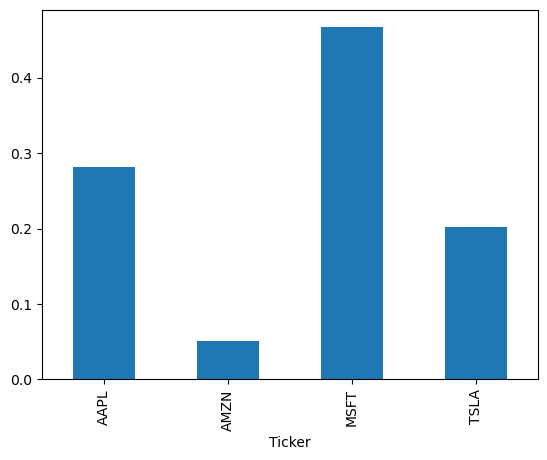

In [7]:
s = pd.Series(p_weights[max_ind], index=x.columns)

s.plot(kind='bar')

plt.show()

<p>You may get slightly different results each time you run the code, as the weights are randomly generated every time!</p>

<h4>We found the best portfolio weights!</h4>
<p>As a last step, let's plot all the 500 portfolios.</p>
<p>The chart is called Efficient Frontier and shows the returns on the Y-axis and volatility on the X-axis.</p>

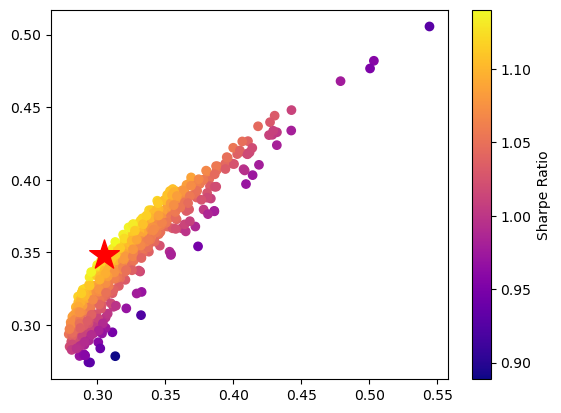

In [8]:
plt.scatter(p_risk, p_returns, c=p_sharpe, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')

plt.scatter(p_risk[max_ind], p_returns[max_ind], color='r', marker='*', s=500)
plt.show()

plt.show()

<p>We used additional parameters to make the chart prettier and add a color bar for the Sharpe ratio.</p>
<p>We have also added a red star marker to the chart, showing the most efficient portfolio with the best Sharpe ratio.</p>

<p>The Efficient Frontier chart shows the return we can get for the given volatility, or, the volatility that we get for a certain return.</p>